# Kvaliteta življenja v Kibergradu

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = 'Kibergrad.csv'
df = pd.read_csv(csv_file_path)

In [3]:
df = df.rename(columns={"'TIP'": 'TIP', "'CLANOV'": 'CLANOV', "'OTROK'": 'OTROK', "'DOHODEK'": 'DOHODEK', "'CETRT'": 'CETRT', "'IZOBRAZBA'": 'IZOBRAZBA'})

## Analiza bogatih in revnih

V tabelo bogatih dodamo 1000 najbogatejših družin.

In [4]:
bogati = df[df["DOHODEK"] > df.sort_values("DOHODEK", ascending=False).iloc[1000]["DOHODEK"]]
bogati["DOHODEK"].mean()

156949.927

In [5]:
df

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA
0,1,2,0,43450,1,39
1,1,2,0,79000,1,40
2,1,2,0,51306,1,39
3,1,4,2,24850,1,41
4,1,4,2,65145,1,43
...,...,...,...,...,...,...
43881,1,5,3,30800,4,36
43882,1,2,0,16684,4,34
43883,1,2,0,12000,4,39
43884,1,2,0,50022,4,34


V tabelo revnih dodamo 1000 najrevnejših družin.

In [6]:
revni = df[df["DOHODEK"] < df.sort_values("DOHODEK", ascending=False).iloc[-1000]["DOHODEK"]]
revni["DOHODEK"].mean()

414.26452905811624

In [7]:
import math
stand_odk_bogati = math.sqrt(bogati["DOHODEK"].var())
stand_odk_revni = math.sqrt(revni["DOHODEK"].var())
stand_odk_bogati

38230.70630577349

In [8]:
stand_odk_bogati = bogati["DOHODEK"].std()
stand_odk_bogati

38230.70630577349

In [9]:
stand_odk_revni

1638.8649441243067

In [10]:
revni["DOHODEK"].max()

2190

Sedaj primerjajmo bogate in revne družine po ostalih parametrih in na podlagi tega postavimo hipoteze o korelacijskem koeficientu med določenimi količinami.

In [11]:
revni["IZOBRAZBA"].mean()

37.833667334669336

In [12]:
bogati["IZOBRAZBA"].mean()

42.648

In [13]:
revni["IZOBRAZBA"].var()

7.655354842081354

In [14]:
bogati["IZOBRAZBA"].var()

6.410506506506506

In [15]:
df["IZOBRAZBA"].min()

31

In [16]:
bogati["IZOBRAZBA"].min()

31

In [17]:
bogati["IZOBRAZBA"].max()

46

In [18]:
revni["IZOBRAZBA"].min()

31

In [19]:
revni["IZOBRAZBA"].max()

45

Opazimo, da morata biti izobrazba in dohodek pozitivno korelirana. Sumimo, da je korelacija nekje 0,3 do 0,4.

In [20]:
bogati["OTROK"].mean()

0.579

In [21]:
revni["OTROK"].mean()

1.2735470941883769

In [22]:
bogati["OTROK"].max()

6

In [23]:
revni["OTROK"].max()

8

Iz zgornjega se zdi, da morata biti število otrok in dohodek negativno korelirana. Korelacijski koeficient bi lahko bil nekje -0,2.

## Preizkus hipotez

In [24]:
df["DOHODEK"].corr(df["IZOBRAZBA"])

0.4499440967870731

In [25]:
df["DOHODEK"].corr(df["OTROK"])

-0.08045934385825014

In [26]:
df.describe()

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA
count,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000
mean,1.430935,3.137288,0.947933,41335.507041,2.526090,39.422504
std,0.793332,1.293711,1.157211,32037.619418,1.078228,3.021883
min,1.000000,2.000000,0.000000,-22166.000000,1.000000,31.000000
25%,1.000000,2.000000,0.000000,18300.000000,2.000000,39.000000
50%,1.000000,3.000000,1.000000,34550.000000,3.000000,39.000000
75%,1.000000,4.000000,2.000000,55827.750000,3.000000,41.000000
max,3.000000,25.000000,9.000000,451887.000000,4.000000,46.000000


In [27]:
df[df["CETRT"].isin([1,2])]

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA
0,1,2,0,43450,1,39
1,1,2,0,79000,1,40
2,1,2,0,51306,1,39
3,1,4,2,24850,1,41
4,1,4,2,65145,1,43
...,...,...,...,...,...,...
20534,1,2,0,31216,2,39
20535,1,3,0,65002,2,40
20536,1,5,3,70674,2,43
20537,1,3,0,57623,2,40


In [28]:
bogati.describe()

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.067000,3.313000,0.579000,156949.927000,2.394000,42.648000
std,0.332598,1.363411,0.935218,38230.706306,1.192554,2.531898
min,1.000000,2.000000,0.000000,123908.000000,1.000000,31.000000
25%,1.000000,2.000000,0.000000,133199.500000,1.000000,41.000000
50%,1.000000,3.000000,0.000000,144947.500000,2.000000,43.000000
75%,1.000000,4.000000,1.000000,166386.750000,4.000000,44.000000
max,3.000000,11.000000,6.000000,451887.000000,4.000000,46.000000


## Srečnostni indeks

In [29]:
import math
u_doh = int(df["DOHODEK"].mean())
u_izo = float(df["IZOBRAZBA"].mean())
def funkcija(x):
    if x < u_doh:
        return 2**(x /u_doh)
    else:
        return 2 + math.log(1 + (x - u_doh)/u_doh, 2)

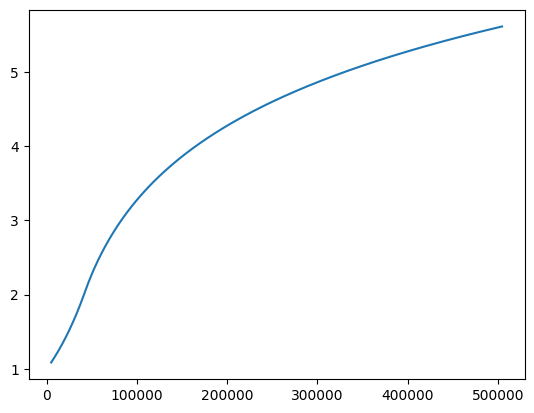

In [30]:
import numpy as np
x_values = []
t = 5000
for i in range(1000):
    x_values.append(t)
    t += 500

y_values = []
for e in x_values:
    y_values.append(funkcija(e))

x_os = np.array(x_values)
y_os = np.array(y_values)

plt.plot(x_os, y_os)
plt.show()

In [31]:
def normalna(x):
    return 1/math.sqrt(2*math.pi*float(df["IZOBRAZBA"].var()))*math.exp(-(x - u_izo)**2/(2*float(df["IZOBRAZBA"].var())))

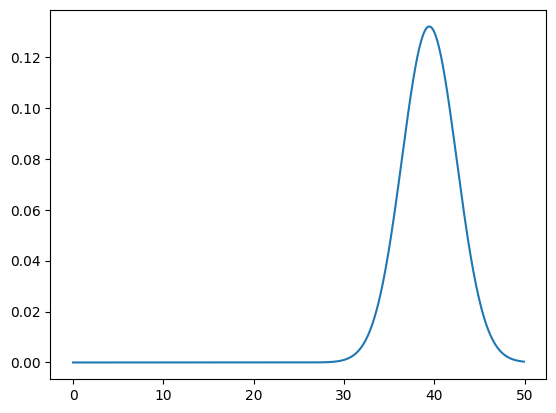

In [32]:
import numpy as np
x_values = []
t = 0
for i in range(500):
    x_values.append(t)
    t += 0.1

y_values = []
for e in x_values:
    y_values.append(normalna(e))

x_os = np.array(x_values)
y_os = np.array(y_values)

plt.plot(x_os, y_os)
plt.show()

In [33]:
df["SRECNOST"] = (df["OTROK"])*(df["DOHODEK"].apply(funkcija))*(df["IZOBRAZBA"].apply(normalna)+20)
df_srecen = df.sort_values("SRECNOST", ascending=False)
df_srecen

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
37379,1,12,9,78555,4,46,527.066465
12810,1,10,8,100500,2,43,526.801403
8946,1,9,7,114535,1,43,487.440731
38998,1,9,6,133090,4,31,442.496026
18596,1,14,9,49880,2,46,409.050107
...,...,...,...,...,...,...,...
25062,1,2,0,13920,3,36,0.000000
8021,1,2,0,70000,1,39,0.000000
25056,3,3,0,23245,3,39,0.000000
25055,3,4,0,29675,3,34,0.000000


<Axes: >

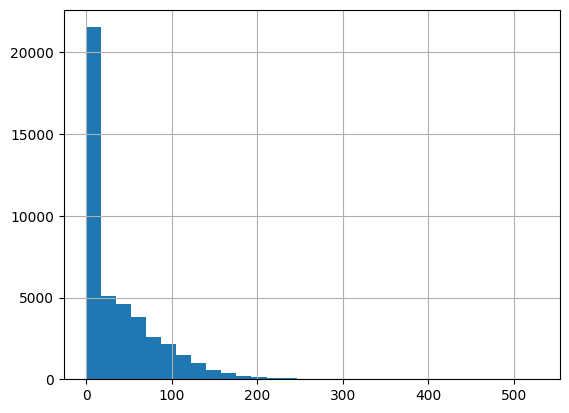

In [34]:
df["SRECNOST"].hist(bins=30)

In [35]:
df_srecen.describe()

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
count,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000
mean,1.430935,3.137288,0.947933,41335.507041,2.526090,39.422504,35.928525
std,0.793332,1.293711,1.157211,32037.619418,1.078228,3.021883,47.516614
min,1.000000,2.000000,0.000000,-22166.000000,1.000000,31.000000,0.000000
25%,1.000000,2.000000,0.000000,18300.000000,2.000000,39.000000,0.000000
50%,1.000000,3.000000,1.000000,34550.000000,3.000000,39.000000,20.781397
75%,1.000000,4.000000,2.000000,55827.750000,3.000000,41.000000,60.319915
max,3.000000,25.000000,9.000000,451887.000000,4.000000,46.000000,527.066465


In [36]:
df_srecen[(df_srecen["SRECNOST"] > 60) & (df_srecen["SRECNOST"] < 62)]

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
39981,1,4,2,26000,4,35,61.999937
9159,3,4,3,1566,1,40,61.995721
1049,1,5,1,87970,1,43,61.995351
6178,1,5,1,87700,1,42,61.987359
30953,3,4,3,1656,3,37,61.984820
...,...,...,...,...,...,...,...
11506,3,3,2,23799,2,39,60.008164
1694,1,5,3,0,1,31,60.008145
4698,3,4,3,0,1,31,60.008145
41243,3,4,3,0,4,31,60.008145


In [37]:
df_srecen.describe()

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
count,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000
mean,1.430935,3.137288,0.947933,41335.507041,2.526090,39.422504,35.928525
std,0.793332,1.293711,1.157211,32037.619418,1.078228,3.021883,47.516614
min,1.000000,2.000000,0.000000,-22166.000000,1.000000,31.000000,0.000000
25%,1.000000,2.000000,0.000000,18300.000000,2.000000,39.000000,0.000000
50%,1.000000,3.000000,1.000000,34550.000000,3.000000,39.000000,20.781397
75%,1.000000,4.000000,2.000000,55827.750000,3.000000,41.000000,60.319915
max,3.000000,25.000000,9.000000,451887.000000,4.000000,46.000000,527.066465


In [38]:
df_srecen["SRECNOST"].corr(df_srecen["IZOBRAZBA"])

0.1733540636745005

In [39]:
df_srecen["SRECNOST"].corr(df_srecen["OTROK"])

0.9020440459927997

In [40]:
df_srecen["SRECNOST"].corr(df_srecen["DOHODEK"])

0.1765587218195095

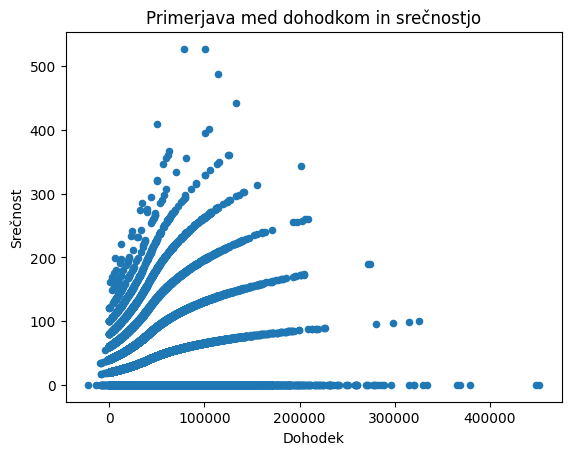

In [41]:
df_srecen.plot.scatter(x="DOHODEK", y="SRECNOST")
plt.title("Primerjava med dohodkom in srečnostjo")
plt.xlabel("Dohodek")
plt.ylabel("Srečnost")
plt.show()

In [42]:
df_srecen.describe()

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
count,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000,43886.000000
mean,1.430935,3.137288,0.947933,41335.507041,2.526090,39.422504,35.928525
std,0.793332,1.293711,1.157211,32037.619418,1.078228,3.021883,47.516614
min,1.000000,2.000000,0.000000,-22166.000000,1.000000,31.000000,0.000000
25%,1.000000,2.000000,0.000000,18300.000000,2.000000,39.000000,0.000000
50%,1.000000,3.000000,1.000000,34550.000000,3.000000,39.000000,20.781397
75%,1.000000,4.000000,2.000000,55827.750000,3.000000,41.000000,60.319915
max,3.000000,25.000000,9.000000,451887.000000,4.000000,46.000000,527.066465


# Analiza prihodka po četrtih

Vzemimo enostaven slučajen vzorec za vsako izmed štirih četrti. 

S tem namenom najprej ustvarimo štiri nove tabele. V vsaki izmed teh so shranjeni podatki o eni izmed četrti.

In [43]:
df.head()

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
0,1,2,0,43450,1,39,0.000000
1,1,2,0,79000,1,40,0.000000
2,1,2,0,51306,1,39,0.000000
3,1,4,2,24850,1,41,61.028013
4,1,4,2,65145,1,43,106.599639


In [44]:
filter1 = (df["CETRT"] == 1)
prva_cetrt = df[filter1]

In [45]:
filter2 = (df["CETRT"] == 2)
druga_cetrt = df[filter2]

In [46]:
filter3 = (df["CETRT"] == 3)
tretja_cetrt = df[filter3]

In [47]:
filter4 = (df["CETRT"] == 4)
cetrta_cetrt = df[filter4]

Sedaj pa vzamemo slučajne vzorce iz teh četrti.

In [48]:
vzorec1 = prva_cetrt.sample(100)
vzorec2 = druga_cetrt.sample(100)
vzorec3 = tretja_cetrt.sample(100)
vzorec4 = cetrta_cetrt.sample(100)

Sedaj narišemo škatlo z brki z vsemi štirimi slučajnimi vzorci in škatlo z brki ustrezno označimo. 

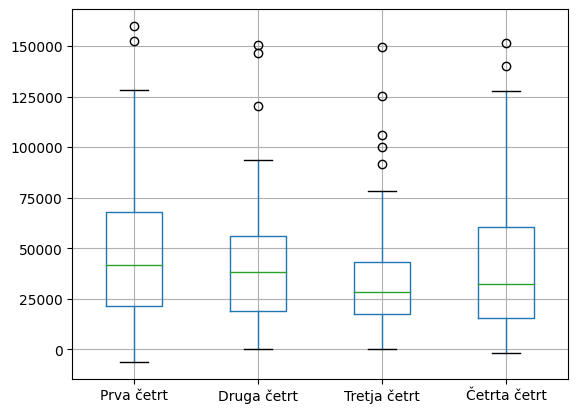

In [49]:
podtabela = pd.DataFrame({"Prva četrt": vzorec1["DOHODEK"].tolist(), 
"Druga četrt": vzorec2["DOHODEK"].tolist(), 
"Tretja četrt": vzorec3["DOHODEK"].tolist(), 
"Četrta četrt": vzorec4["DOHODEK"].tolist()})

graf = podtabela.boxplot(column=["Prva četrt", "Druga četrt", "Tretja četrt", "Četrta četrt"])

plt.show()

Iz severne četrti vzemite še štiri enostavne slučajne vzorce velikosti 100. Za vseh pet vzorcev iz severne četrti spet narišite vzporedne škatle z brki. Komentirajte!

In [50]:
severna2 = prva_cetrt.sample(100)
severna3 = prva_cetrt.sample(100)
severna4 = prva_cetrt.sample(100)
severna5 = prva_cetrt.sample(100)

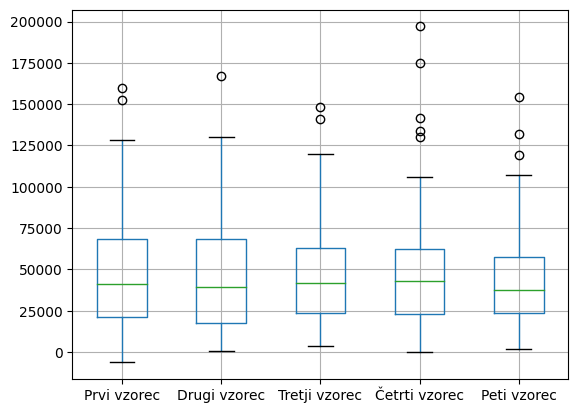

In [51]:
podtabela1 = pd.DataFrame({"Prvi vzorec": vzorec1["DOHODEK"].tolist(),
"Drugi vzorec": severna2["DOHODEK"].tolist(),
"Tretji vzorec": severna3["DOHODEK"].tolist(),
"Četrti vzorec": severna4["DOHODEK"].tolist(),
"Peti vzorec": severna5["DOHODEK"].tolist()})

graf2 = podtabela1.boxplot(column=["Prvi vzorec", "Drugi vzorec", "Tretji vzorec", "Četrti vzorec", "Peti vzorec"])
plt.show()

## Treniranje metod: apply, map, replace, applymap in drop

In [52]:
df

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
0,1,2,0,43450,1,39,0.000000
1,1,2,0,79000,1,40,0.000000
2,1,2,0,51306,1,39,0.000000
3,1,4,2,24850,1,41,61.028013
4,1,4,2,65145,1,43,106.599639
...,...,...,...,...,...,...,...
43881,1,5,3,30800,4,36,100.917164
43882,1,2,0,16684,4,34,0.000000
43883,1,2,0,12000,4,39,0.000000
43884,1,2,0,50022,4,34,0.000000


In [54]:
import math
df["LOGARITMIRANA SRECNOST"] = df["SRECNOST"].apply(math.sin)
df

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST,LOGARITMIRANA SRECNOST
0,1,2,0,43450,1,39,0.000000,0.000000
1,1,2,0,79000,1,40,0.000000,0.000000
2,1,2,0,51306,1,39,0.000000,0.000000
3,1,4,2,24850,1,41,61.028013,-0.972968
4,1,4,2,65145,1,43,106.599639,-0.212870
...,...,...,...,...,...,...,...,...
43881,1,5,3,30800,4,36,100.917164,0.376670
43882,1,2,0,16684,4,34,0.000000,0.000000
43883,1,2,0,12000,4,39,0.000000,0.000000
43884,1,2,0,50022,4,34,0.000000,0.000000


In [57]:
df.drop(columns=['LOGARITMIRANA SRECNOST'], inplace=True)

In [58]:
df

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
0,1,2,0,43450,1,39,0.000000
1,1,2,0,79000,1,40,0.000000
2,1,2,0,51306,1,39,0.000000
3,1,4,2,24850,1,41,61.028013
4,1,4,2,65145,1,43,106.599639
...,...,...,...,...,...,...,...
43881,1,5,3,30800,4,36,100.917164
43882,1,2,0,16684,4,34,0.000000
43883,1,2,0,12000,4,39,0.000000
43884,1,2,0,50022,4,34,0.000000


In [59]:
def kolicina(n):
    if n == 1 or n == 2:
        return True 
    else:
        return False

df["LOJZE"] = df["OTROK"].apply(kolicina)
df

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST,LOJZE
0,1,2,0,43450,1,39,0.000000,False
1,1,2,0,79000,1,40,0.000000,False
2,1,2,0,51306,1,39,0.000000,False
3,1,4,2,24850,1,41,61.028013,True
4,1,4,2,65145,1,43,106.599639,True
...,...,...,...,...,...,...,...,...
43881,1,5,3,30800,4,36,100.917164,False
43882,1,2,0,16684,4,34,0.000000,False
43883,1,2,0,12000,4,39,0.000000,False
43884,1,2,0,50022,4,34,0.000000,False


In [60]:
filt = (df["LOJZE"] == True)
round(100*len(df[filt])/len(df),3)

40.662

In [61]:
df.drop(columns=['LOJZE'], inplace=True)
df

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
0,1,2,0,43450,1,39,0.000000
1,1,2,0,79000,1,40,0.000000
2,1,2,0,51306,1,39,0.000000
3,1,4,2,24850,1,41,61.028013
4,1,4,2,65145,1,43,106.599639
...,...,...,...,...,...,...,...
43881,1,5,3,30800,4,36,100.917164
43882,1,2,0,16684,4,34,0.000000
43883,1,2,0,12000,4,39,0.000000
43884,1,2,0,50022,4,34,0.000000


In [64]:
df["TIP"] = df["TIP"].map({1:"sex", 2: "faith"})

In [66]:
df.head(30)

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
0,sex,2,0,43450,1,39,0.000000
1,sex,2,0,79000,1,40,0.000000
2,sex,2,0,51306,1,39,0.000000
3,sex,4,2,24850,1,41,61.028013
4,sex,4,2,65145,1,43,106.599639
5,NaN,3,2,23015,1,40,59.221156
6,NaN,2,1,26000,1,40,31.130473
7,sex,2,0,13112,1,39,0.000000
8,NaN,3,2,5436,1,39,44.104033
9,sex,2,0,103524,1,45,0.000000


In [68]:
df["TIP"] = df["TIP"].replace({"sex": "ljubezen"})
df

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
0,ljubezen,2,0,43450,1,39,0.000000
1,ljubezen,2,0,79000,1,40,0.000000
2,ljubezen,2,0,51306,1,39,0.000000
3,ljubezen,4,2,24850,1,41,61.028013
4,ljubezen,4,2,65145,1,43,106.599639
...,...,...,...,...,...,...,...
43881,ljubezen,5,3,30800,4,36,100.917164
43882,ljubezen,2,0,16684,4,34,0.000000
43883,ljubezen,2,0,12000,4,39,0.000000
43884,ljubezen,2,0,50022,4,34,0.000000


In [69]:
df["TIP"] = df["TIP"].map({"faith": "vera"})

In [70]:
df

,TIP,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
0,NaN,2,0,43450,1,39,0.000000
1,NaN,2,0,79000,1,40,0.000000
2,NaN,2,0,51306,1,39,0.000000
3,NaN,4,2,24850,1,41,61.028013
4,NaN,4,2,65145,1,43,106.599639
...,...,...,...,...,...,...,...
43881,NaN,5,3,30800,4,36,100.917164
43882,NaN,2,0,16684,4,34,0.000000
43883,NaN,2,0,12000,4,39,0.000000
43884,NaN,2,0,50022,4,34,0.000000


In [71]:
df.drop(columns=["TIP"], inplace=True)

In [72]:
df

,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
0,2,0,43450,1,39,0.000000
1,2,0,79000,1,40,0.000000
2,2,0,51306,1,39,0.000000
3,4,2,24850,1,41,61.028013
4,4,2,65145,1,43,106.599639
...,...,...,...,...,...,...
43881,5,3,30800,4,36,100.917164
43882,2,0,16684,4,34,0.000000
43883,2,0,12000,4,39,0.000000
43884,2,0,50022,4,34,0.000000


In [73]:
df["SRECNOST"] = df["SRECNOST"].apply(lambda x: x + 10)
df

,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
0,2,0,43450,1,39,10.000000
1,2,0,79000,1,40,10.000000
2,2,0,51306,1,39,10.000000
3,4,2,24850,1,41,71.028013
4,4,2,65145,1,43,116.599639
...,...,...,...,...,...,...
43881,5,3,30800,4,36,110.917164
43882,2,0,16684,4,34,10.000000
43883,2,0,12000,4,39,10.000000
43884,2,0,50022,4,34,10.000000


### Nova tabela za igranje z metodama replace in map

In [74]:
dgoggins = {"distance": [10,12,17], "calories": [600, 800, 1200], "duration": [54, 56, 79]}
davidframe = pd.DataFrame(dgoggins)
davidframe

,distance,calories,duration
0,10,600,54
1,12,800,56
2,17,1200,79


In [75]:
davidframe["distance"].replace({10: 16, 12: 18})

0    16
1    18
2    17
Name: distance, dtype: int64

In [77]:
davidframe["distance"].map({10:16, 12:18})

0    16.0
1    18.0
2     NaN
Name: distance, dtype: float64

In [78]:
df

,CLANOV,OTROK,DOHODEK,CETRT,IZOBRAZBA,SRECNOST
0,2,0,43450,1,39,10.000000
1,2,0,79000,1,40,10.000000
2,2,0,51306,1,39,10.000000
3,4,2,24850,1,41,71.028013
4,4,2,65145,1,43,116.599639
...,...,...,...,...,...,...
43881,5,3,30800,4,36,110.917164
43882,2,0,16684,4,34,10.000000
43883,2,0,12000,4,39,10.000000
43884,2,0,50022,4,34,10.000000


In [79]:
davidframe

,distance,calories,duration
0,10,600,54
1,12,800,56
2,17,1200,79


In [80]:
davidframe["duration"].map({54:60, 56:54, 79:60})

0    60
1    54
2    60
Name: duration, dtype: int64

In [81]:
davidframe["duration"].replace({54:48})

0    48
1    56
2    79
Name: duration, dtype: int64